In [135]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [136]:
import pandas as pd

# Load the dataset
df = pd.read_csv('temperature.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Extract features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day  # Use 'Day' instead of 'Date' to avoid column name conflicts
df.rename(columns={"year": "Year", "month": "Month", "date": "Date"}, inplace=True)

# Display the dataframe with new features
print("Updated DataFrame:")
df.head()

# Save the updated dataset to a new CSV file
df.to_csv('updated_temperature.csv')
print("\nUpdated dataset saved successfully as 'updated_temperature.csv'.")


Updated DataFrame:

Updated dataset saved successfully as 'updated_temperature.csv'.


In [137]:
df.head()


,Temp Max (°F),Temp Avg (°F),Temp Min (°F),Dew Point Max (°F),Dew Point Avg (°F),Dew Point Min (°F),Humidity Max (%),Humidity Avg (%),Humidity Min (%),Wind Speed Max (mph),Wind Speed Avg (mph),Wind Speed Min (mph),Pressure Max (in),Pressure Avg (in),Pressure Min (in),Precipitation Total (in),Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,
2024-01-01,84.0,69.8,61,86.0,61.1,57,94.0,75.7,51,6.0,1.9,0,29.0,28.9,28.8,0,2024,1,1
2024-01-02,82.0,69.3,59,86.0,60.4,55,94.0,74.9,51,6.0,1.8,0,29.0,28.9,28.8,0,2024,1,2
2024-01-03,81.0,69.8,59,88.0,62.3,55,94.0,78.4,51,6.0,1.8,0,29.0,28.9,28.8,0,2024,1,3
2024-01-04,81.0,70.4,63,86.0,62.7,57,94.0,73.8,51,3.0,1.0,0,29.0,28.9,28.8,0,2024,1,4
2024-01-05,82.0,72.4,61,86.0,63.9,59,94.0,78.6,51,5.0,2.1,0,29.0,28.9,28.8,0,2024,1,5


In [138]:
print(df.columns)


Index(['Temp Max (°F)', 'Temp Avg (°F)', 'Temp Min (°F)', 'Dew Point Max (°F)',
       'Dew Point Avg (°F)', 'Dew Point Min (°F)', 'Humidity Max (%)',
       'Humidity Avg (%)', 'Humidity Min (%)', 'Wind Speed Max (mph)',
       'Wind Speed Avg (mph)', 'Wind Speed Min (mph)', 'Pressure Max (in)',
       'Pressure Avg (in)', 'Pressure Min (in)', 'Precipitation Total (in)',
       'Year', 'Month', 'Day'],
      dtype='object')


In [139]:
print(df.isnull().sum())


Temp Max (°F)               0
Temp Avg (°F)               0
Temp Min (°F)               0
Dew Point Max (°F)          0
Dew Point Avg (°F)          0
Dew Point Min (°F)          0
Humidity Max (%)            0
Humidity Avg (%)            0
Humidity Min (%)            0
Wind Speed Max (mph)        0
Wind Speed Avg (mph)        0
Wind Speed Min (mph)        0
Pressure Max (in)           0
Pressure Avg (in)           0
Pressure Min (in)           0
Precipitation Total (in)    0
Year                        0
Month                       0
Day                         0
dtype: int64


In [140]:
df.head()

,Temp Max (°F),Temp Avg (°F),Temp Min (°F),Dew Point Max (°F),Dew Point Avg (°F),Dew Point Min (°F),Humidity Max (%),Humidity Avg (%),Humidity Min (%),Wind Speed Max (mph),Wind Speed Avg (mph),Wind Speed Min (mph),Pressure Max (in),Pressure Avg (in),Pressure Min (in),Precipitation Total (in),Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,
2024-01-01,84.0,69.8,61,86.0,61.1,57,94.0,75.7,51,6.0,1.9,0,29.0,28.9,28.8,0,2024,1,1
2024-01-02,82.0,69.3,59,86.0,60.4,55,94.0,74.9,51,6.0,1.8,0,29.0,28.9,28.8,0,2024,1,2
2024-01-03,81.0,69.8,59,88.0,62.3,55,94.0,78.4,51,6.0,1.8,0,29.0,28.9,28.8,0,2024,1,3
2024-01-04,81.0,70.4,63,86.0,62.7,57,94.0,73.8,51,3.0,1.0,0,29.0,28.9,28.8,0,2024,1,4
2024-01-05,82.0,72.4,61,86.0,63.9,59,94.0,78.6,51,5.0,2.1,0,29.0,28.9,28.8,0,2024,1,5


In [141]:
print(df.isnull().sum())


Temp Max (°F)               0
Temp Avg (°F)               0
Temp Min (°F)               0
Dew Point Max (°F)          0
Dew Point Avg (°F)          0
Dew Point Min (°F)          0
Humidity Max (%)            0
Humidity Avg (%)            0
Humidity Min (%)            0
Wind Speed Max (mph)        0
Wind Speed Avg (mph)        0
Wind Speed Min (mph)        0
Pressure Max (in)           0
Pressure Avg (in)           0
Pressure Min (in)           0
Precipitation Total (in)    0
Year                        0
Month                       0
Day                         0
dtype: int64


In [142]:
df.head()



,Temp Max (°F),Temp Avg (°F),Temp Min (°F),Dew Point Max (°F),Dew Point Avg (°F),Dew Point Min (°F),Humidity Max (%),Humidity Avg (%),Humidity Min (%),Wind Speed Max (mph),Wind Speed Avg (mph),Wind Speed Min (mph),Pressure Max (in),Pressure Avg (in),Pressure Min (in),Precipitation Total (in),Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,
2024-01-01,84.0,69.8,61,86.0,61.1,57,94.0,75.7,51,6.0,1.9,0,29.0,28.9,28.8,0,2024,1,1
2024-01-02,82.0,69.3,59,86.0,60.4,55,94.0,74.9,51,6.0,1.8,0,29.0,28.9,28.8,0,2024,1,2
2024-01-03,81.0,69.8,59,88.0,62.3,55,94.0,78.4,51,6.0,1.8,0,29.0,28.9,28.8,0,2024,1,3
2024-01-04,81.0,70.4,63,86.0,62.7,57,94.0,73.8,51,3.0,1.0,0,29.0,28.9,28.8,0,2024,1,4
2024-01-05,82.0,72.4,61,86.0,63.9,59,94.0,78.6,51,5.0,2.1,0,29.0,28.9,28.8,0,2024,1,5


In [143]:
print(df.dtypes)

Temp Max (°F)               float64
Temp Avg (°F)               float64
Temp Min (°F)                 int64
Dew Point Max (°F)          float64
Dew Point Avg (°F)          float64
Dew Point Min (°F)            int64
Humidity Max (%)            float64
Humidity Avg (%)            float64
Humidity Min (%)              int64
Wind Speed Max (mph)        float64
Wind Speed Avg (mph)        float64
Wind Speed Min (mph)          int64
Pressure Max (in)           float64
Pressure Avg (in)           float64
Pressure Min (in)           float64
Precipitation Total (in)      int64
Year                          int32
Month                         int32
Day                           int32
dtype: object


In [144]:
# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df.index)

# Extract valid Year, Month, and Day from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [145]:
# Recalculate sinusoidal features
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)


In [146]:
# Replace invalid values with NaN and interpolate
df.replace(-1, np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)  # Forward-fill as an example


C:\Users\NICE\AppData\Local\Temp\ipykernel_3332\4008281355.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward-fill as an example


In [147]:
print(df.head())
print(df.isnull().sum())


            Temp Max (°F)  Temp Avg (°F)  Temp Min (°F)  Dew Point Max (°F)  \
Date                                                                          
2024-01-01           84.0           69.8             61                86.0   
2024-01-02           82.0           69.3             59                86.0   
2024-01-03           81.0           69.8             59                88.0   
2024-01-04           81.0           70.4             63                86.0   
2024-01-05           82.0           72.4             61                86.0   

            Dew Point Avg (°F)  Dew Point Min (°F)  Humidity Max (%)  \
Date                                                                   
2024-01-01                61.1                  57              94.0   
2024-01-02                60.4                  55              94.0   
2024-01-03                62.3                  55              94.0   
2024-01-04                62.7                  57              94.0   
2024-01-05    

In [148]:
df.head()

,Temp Max (°F),Temp Avg (°F),Temp Min (°F),Dew Point Max (°F),Dew Point Avg (°F),Dew Point Min (°F),Humidity Max (%),Humidity Avg (%),Humidity Min (%),Wind Speed Max (mph),...,Pressure Max (in),Pressure Avg (in),Pressure Min (in),Precipitation Total (in),Year,Month,Day,Date,Month_sin,Day_sin
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,84.0,69.8,61,86.0,61.1,57,94.0,75.7,51,6.0,...,29.0,28.9,28.8,0,2024,1,1,2024-01-01,0.5,0.201299
2024-01-02,82.0,69.3,59,86.0,60.4,55,94.0,74.9,51,6.0,...,29.0,28.9,28.8,0,2024,1,2,2024-01-02,0.5,0.394356
2024-01-03,81.0,69.8,59,88.0,62.3,55,94.0,78.4,51,6.0,...,29.0,28.9,28.8,0,2024,1,3,2024-01-03,0.5,0.571268
2024-01-04,81.0,70.4,63,86.0,62.7,57,94.0,73.8,51,3.0,...,29.0,28.9,28.8,0,2024,1,4,2024-01-04,0.5,0.724793
2024-01-05,82.0,72.4,61,86.0,63.9,59,94.0,78.6,51,5.0,...,29.0,28.9,28.8,0,2024,1,5,2024-01-05,0.5,0.848644


In [149]:
# Drop columns not used for training (e.g., Date, target variable)
X = df.drop(["Temp Max (°F)", "Date"], axis=1)  # Features
y = df["Temp Max (°F)"]  # Target variable


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [151]:
# Initialize and train Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [152]:
# Predict on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 10.505139999999995


In [153]:
# Example real-time data (replace with actual real-time input)
real_time_data = X_test.iloc[0].to_frame().T
real_time_prediction = model.predict(real_time_data)
print("Prediction for Real-Time Data:", real_time_prediction)


Prediction for Real-Time Data: [106.88]


In [154]:
# Add prediction to the original dataset for visualization
df["Predicted Temp Max (°F)"] = model.predict(X)
print(df[["Year", "Month", "Date", "Temp Max (°F)", "Predicted Temp Max (°F)"]])


            Year  Month       Date  Temp Max (°F)  Predicted Temp Max (°F)
Date                                                                      
2024-01-01  2024      1 2024-01-01           84.0                    82.14
2024-01-02  2024      1 2024-01-02           82.0                    82.41
2024-01-03  2024      1 2024-01-03           81.0                    81.63
2024-01-04  2024      1 2024-01-04           81.0                    81.53
2024-01-05  2024      1 2024-01-05           82.0                    82.46
...          ...    ...        ...            ...                      ...
2025-01-27  2025      1 2025-01-27           73.0                    83.77
2025-01-28  2025      1 2025-01-28           76.0                    81.16
2025-01-29  2025      1 2025-01-29           76.0                    80.21
2025-01-30  2025      1 2025-01-30           78.0                    86.51
2025-01-31  2025      1 2025-01-31           91.0                    88.98

[417 rows x 5 columns]


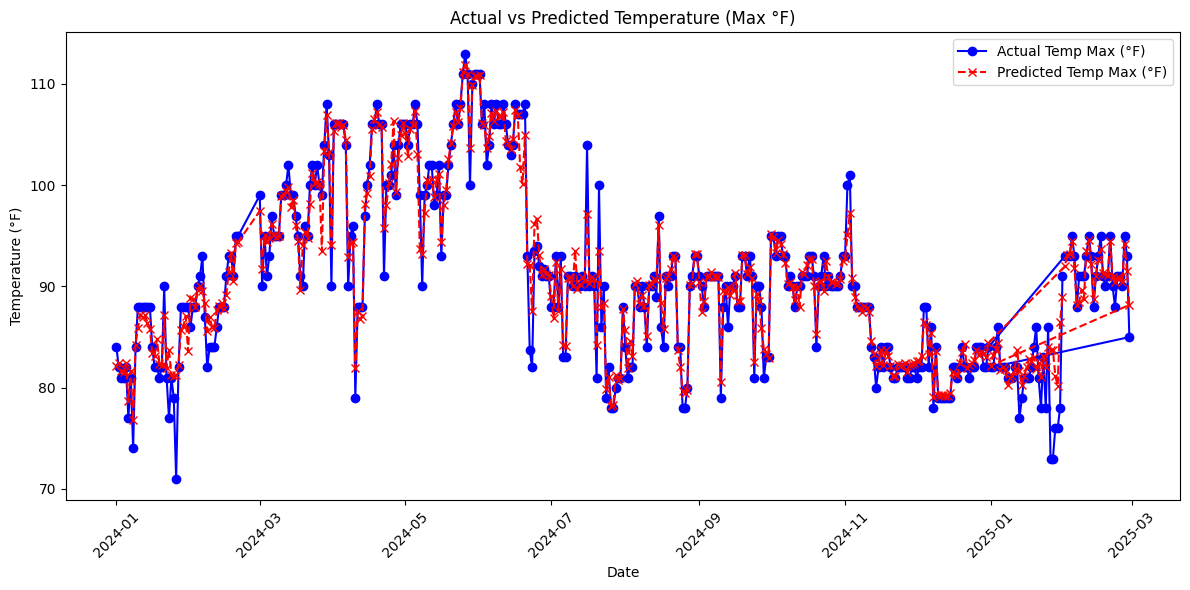

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` is already populated with data and has the following columns:
# 'Year', 'Month', 'Date', 'Temp Max (°F)', and 'Predicted Temp Max (°F)'

# Create a line plot to compare actual and predicted values
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the actual temperature
plt.plot(
    df["Date"], 
    df["Temp Max (°F)"], 
    label="Actual Temp Max (°F)", 
    color="blue", 
    marker="o"
)

# Plot the predicted temperature
plt.plot(
    df["Date"], 
    df["Predicted Temp Max (°F)"], 
    label="Predicted Temp Max (°F)", 
    color="red", 
    linestyle="--", 
    marker="x"
)

# Add labels, title, and legend
plt.xlabel("Date")  # x-axis label
plt.ylabel("Temperature (°F)")  # y-axis label
plt.title("Actual vs Predicted Temperature (Max °F)")  # Add a title
plt.legend()  # Show legend to differentiate lines

# Optional: Format x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


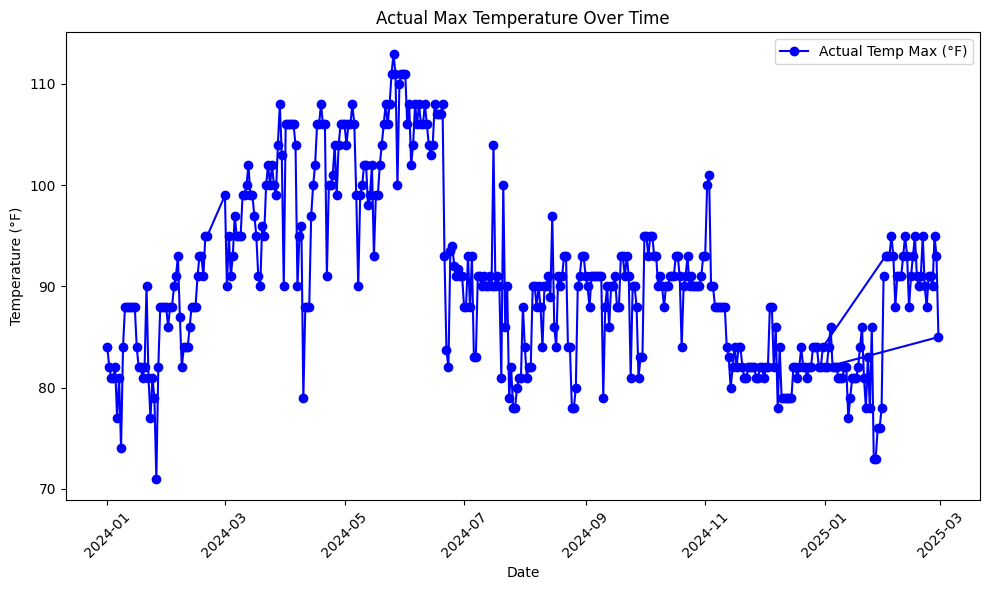

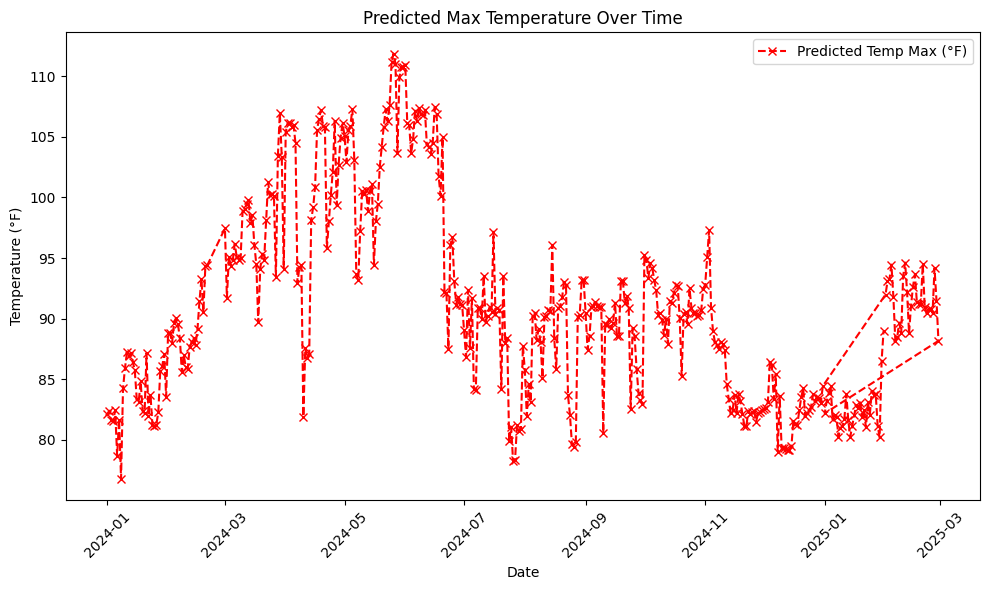

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` already has the following columns:
# 'Date', 'Temp Max (°F)', and 'Predicted Temp Max (°F)'

# Plot for actual temperature
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Temp Max (°F)"], label="Actual Temp Max (°F)", color="blue", marker="o")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Actual Max Temperature Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot for predicted temperature
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Predicted Temp Max (°F)"], label="Predicted Temp Max (°F)", color="red", linestyle="--", marker="x")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Predicted Max Temperature Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


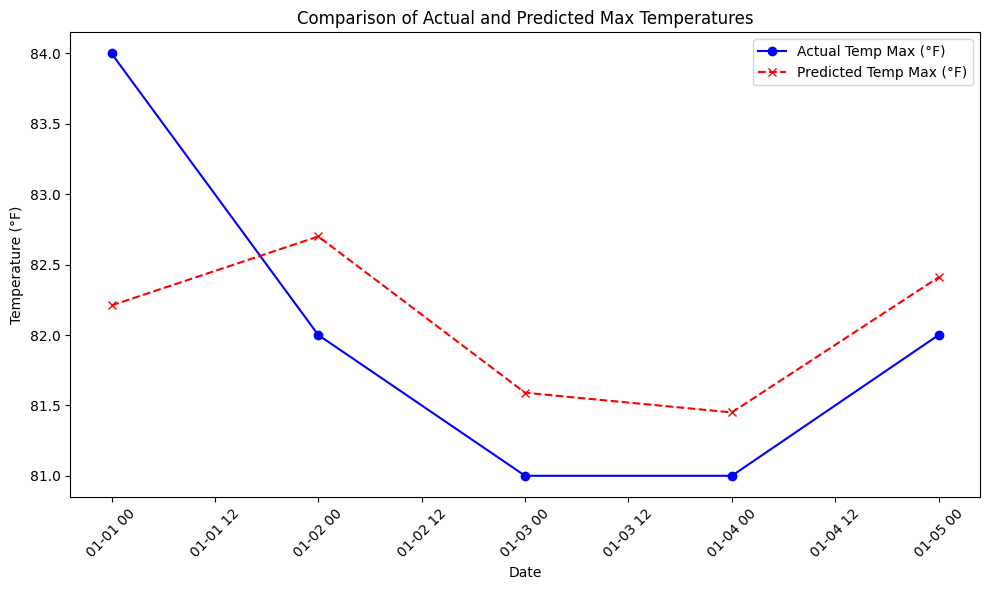

In [157]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your data as a dictionary
data = {
    "Date": ["2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04", "2024-01-05"],
    "Temp Max (°F)": [84.0, 82.0, 81.0, 81.0, 82.0],
    "Predicted Temp Max (°F)": [82.21, 82.70, 81.59, 81.45, 82.41]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Convert 'Date' column to datetime for better plotting
df["Date"] = pd.to_datetime(df["Date"])

# Plot the data
plt.figure(figsize=(10, 6))

# Actual Temperature
plt.plot(df["Date"], df["Temp Max (°F)"], label="Actual Temp Max (°F)", color="blue", marker="o")

# Predicted Temperature
plt.plot(df["Date"], df["Predicted Temp Max (°F)"], label="Predicted Temp Max (°F)", color="red", linestyle="--", marker="x")

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Comparison of Actual and Predicted Max Temperatures")
plt.legend()

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


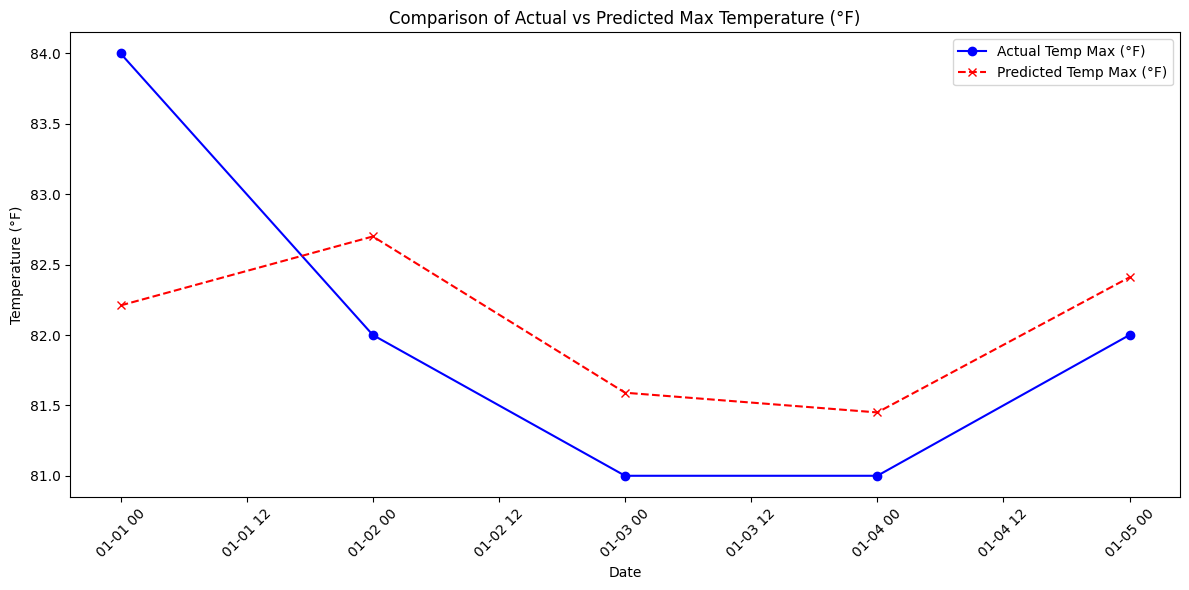

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` has the required columns
# 'Date', 'Temp Max (°F)', and 'Predicted Temp Max (°F)'

plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the actual temperatures
plt.plot(
    df["Date"],
    df["Temp Max (°F)"],
    label="Actual Temp Max (°F)",
    color="blue",
    marker="o"
)

# Plot the predicted temperatures
plt.plot(
    df["Date"],
    df["Predicted Temp Max (°F)"],
    label="Predicted Temp Max (°F)",
    color="red",
    linestyle="--",
    marker="x"
)

# Add labels, title, legend, and format
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Comparison of Actual vs Predicted Max Temperature (°F)")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid overlap

# Show the plot
plt.show()


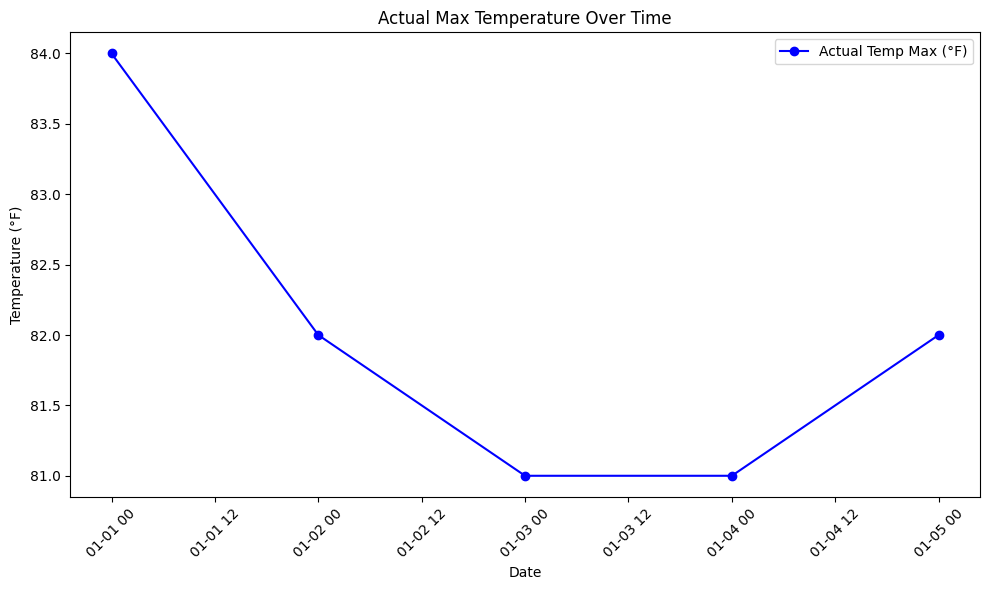

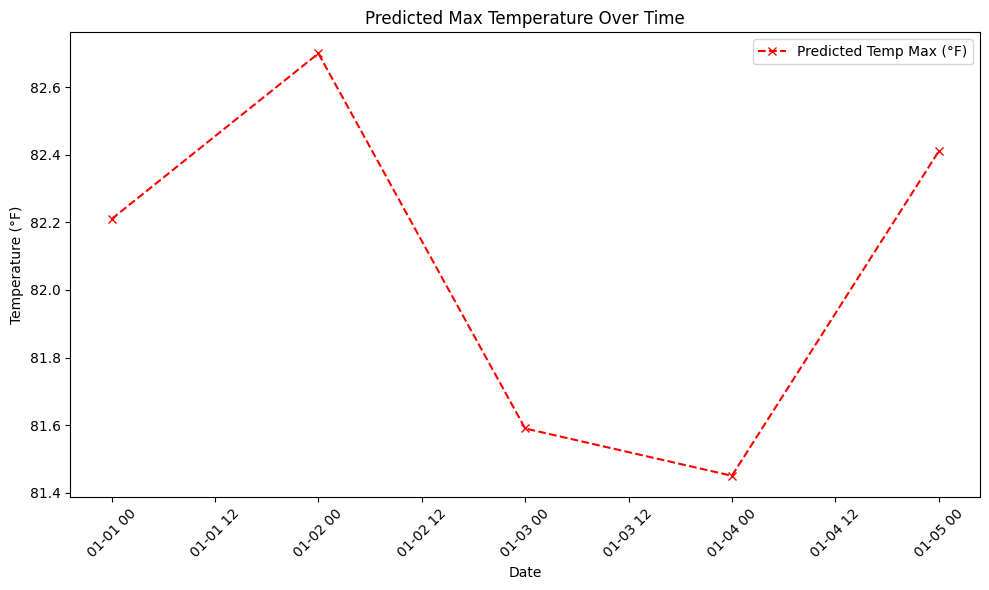

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` already has the following columns:
# 'Date', 'Temp Max (°F)', and 'Predicted Temp Max (°F)'

# Plot for actual temperature
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Temp Max (°F)"], label="Actual Temp Max (°F)", color="blue", marker="o")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Actual Max Temperature Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot for predicted temperature
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Predicted Temp Max (°F)"], label="Predicted Temp Max (°F)", color="red", linestyle="--", marker="x")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Predicted Max Temperature Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


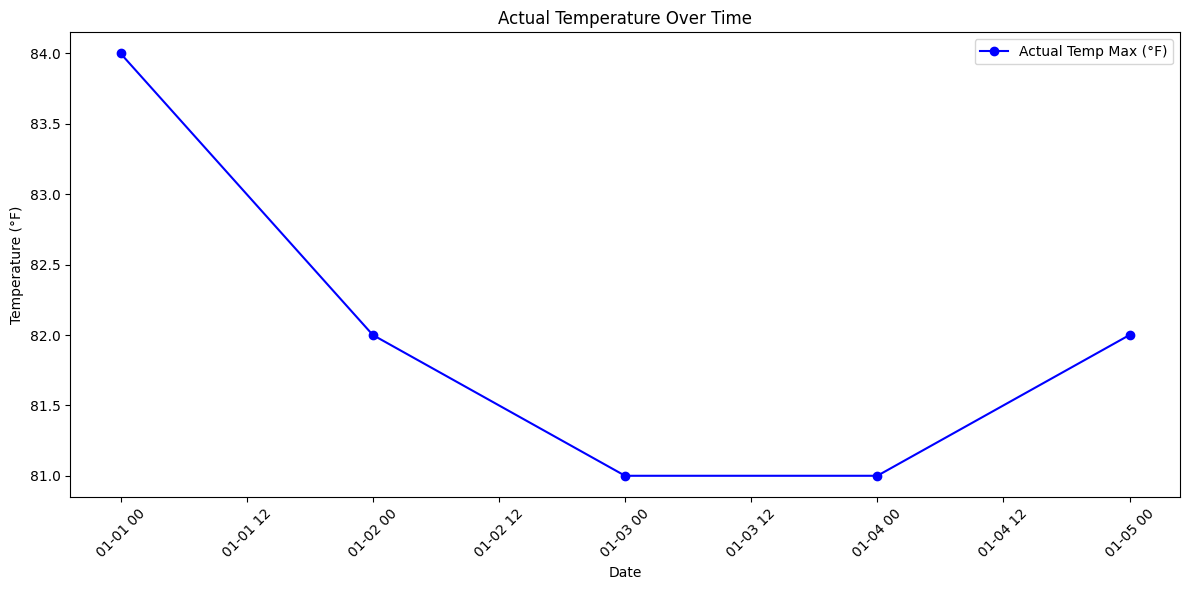

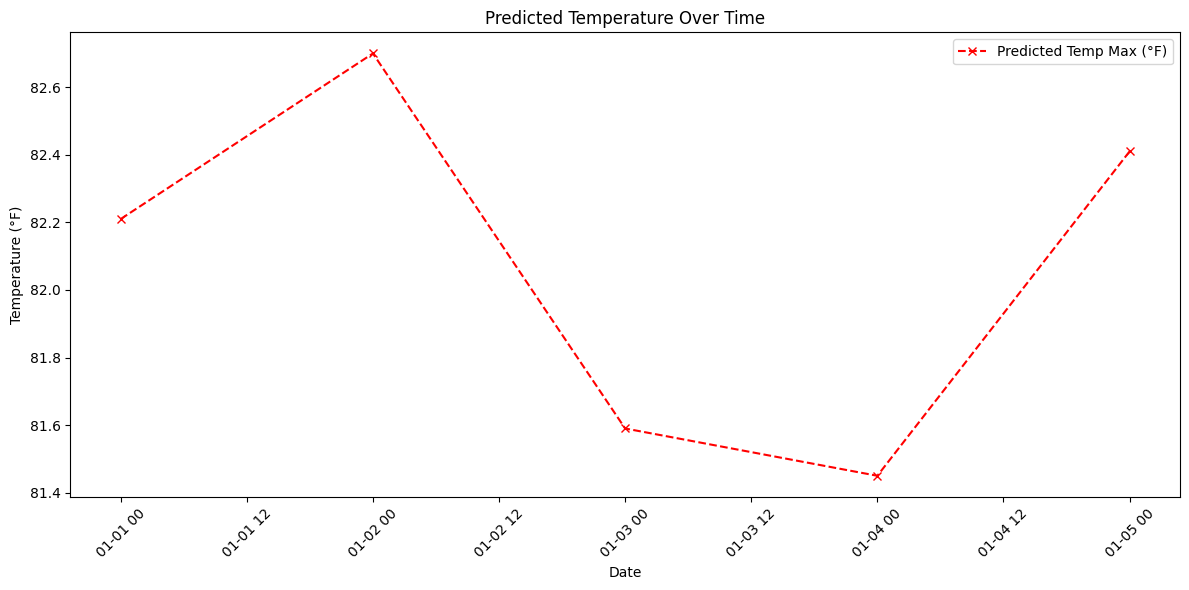

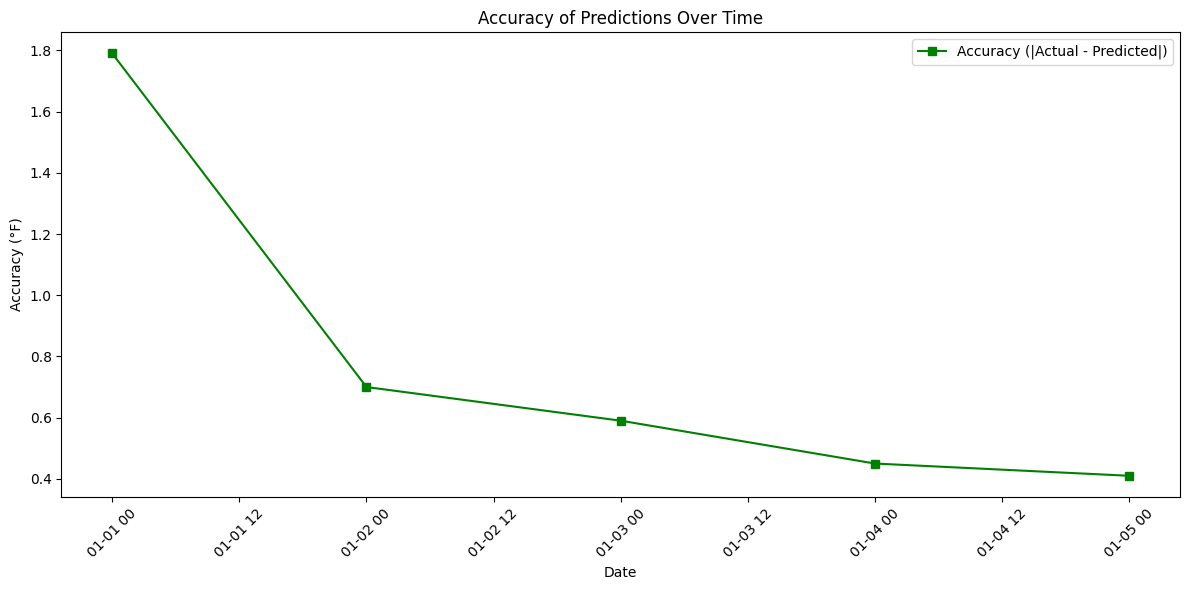

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has columns: 'Date', 'Temp Max (°F)', and 'Predicted Temp Max (°F)'

# Calculate the accuracy difference
df["Accuracy"] = abs(df["Temp Max (°F)"] - df["Predicted Temp Max (°F)"])

# Plot actual temperatures
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Temp Max (°F)"], label="Actual Temp Max (°F)", color="blue", marker="o")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Actual Temperature Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Predicted Temp Max (°F)"], label="Predicted Temp Max (°F)", color="red", linestyle="--", marker="x")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Predicted Temperature Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot accuracy (difference between actual and predicted temperatures)
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Accuracy"], label="Accuracy (|Actual - Predicted|)", color="green", marker="s")
plt.xlabel("Date")
plt.ylabel("Accuracy (°F)")
plt.title("Accuracy of Predictions Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [161]:
'updated_temperature.csv'

'updated_temperature.csv'

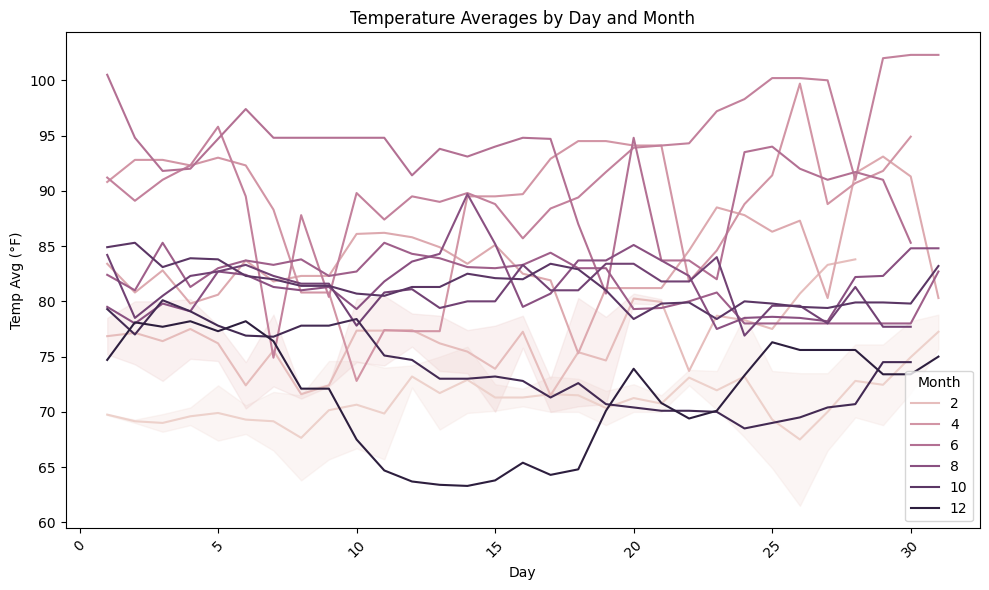

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and inspect the dataset
data = pd.read_csv("updated_temperature.csv")  # Replace with your actual CSV file


# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Temp Avg (°F)', hue='Month', data=data)  # Ensure column names match
plt.xlabel('Day')  # X-axis label
plt.ylabel('Temp Avg (°F)')  # Y-axis label
plt.title('Temperature Averages by Day and Month')  # Title
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot


In [163]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib  # For saving and loading the model

# Load dataset and preprocess (ensure this is done properly as explained earlier)
df = pd.read_csv("updated_temperature.csv")
df['Date'] = pd.to_datetime(df.index)  # Parse the date from the index
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

# Define features and target
X = df.drop(["Temp Max (°F)", "Date"], axis=1)
y = df["Temp Max (°F)"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'temperature_prediction_model.pkl')  # Save the model to a .pkl file
print("Model saved as 'temperature_prediction_model.pkl'")


Model saved as 'temperature_prediction_model.pkl'


In [164]:
import joblib
import pandas as pd

# Load the saved model
temp_model = joblib.load('temperature_prediction_model.pkl')
print("Model loaded successfully!")

# Load the dataset
df = pd.read_csv("updated_temperature.csv")
df.head()  # Preview the dataset to ensure the correct structure


Model loaded successfully!


,Date,Temp Max (°F),Temp Avg (°F),Temp Min (°F),Dew Point Max (°F),Dew Point Avg (°F),Dew Point Min (°F),Humidity Max (%),Humidity Avg (%),Humidity Min (%),Wind Speed Max (mph),Wind Speed Avg (mph),Wind Speed Min (mph),Pressure Max (in),Pressure Avg (in),Pressure Min (in),Precipitation Total (in),Year,Month,Day
0,2024-01-01,84.0,69.8,61,86.0,61.1,57,94.0,75.7,51,6.0,1.9,0,29.0,28.9,28.8,0,2024,1,1
1,2024-01-02,82.0,69.3,59,86.0,60.4,55,94.0,74.9,51,6.0,1.8,0,29.0,28.9,28.8,0,2024,1,2
2,2024-01-03,81.0,69.8,59,88.0,62.3,55,94.0,78.4,51,6.0,1.8,0,29.0,28.9,28.8,0,2024,1,3
3,2024-01-04,81.0,70.4,63,86.0,62.7,57,94.0,73.8,51,3.0,1.0,0,29.0,28.9,28.8,0,2024,1,4
4,2024-01-05,82.0,72.4,61,86.0,63.9,59,94.0,78.6,51,5.0,2.1,0,29.0,28.9,28.8,0,2024,1,5


In [165]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load and preprocess the dataset
df = pd.read_csv("temperature.csv")  # Replace with your file path
df['Date'] = pd.to_datetime(df.index)  # Parse the date from index
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

# Define features
X = df.drop(["Temp Max (°F)", "Humidity Max (%)", "Date"], axis=1)  # Features

# Define separate targets
y_temp = df["Temp Max (°F)"]
y_humidity = df["Humidity Max (%)"]

# Train-Test Splits
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_humidity, X_test_humidity, y_train_humidity, y_test_humidity = train_test_split(X, y_humidity, test_size=0.2, random_state=42)

# Train Temperature Model
temp_model = RandomForestRegressor()
temp_model.fit(X_train_temp, y_train_temp)
joblib.dump(temp_model, 'temperature_prediction_model.pkl')  # Save temperature model

# Train Humidity Model
humidity_model = RandomForestRegressor()
humidity_model.fit(X_train_humidity, y_train_humidity)
joblib.dump(humidity_model, 'humidity_prediction_model.pkl')  # Save humidity model

print("Models trained and saved successfully!")


Models trained and saved successfully!


In [166]:
import serial
import joblib
import pandas as pd
import numpy as np
from datetime import datetime
import time
import keyboard  # Import keyboard module for key detection

# Load trained models
temp_model = joblib.load('temperature_prediction_model.pkl')
humidity_model = joblib.load('humidity_prediction_model.pkl')
print("Models loaded successfully!")

# Connect to Arduino
arduino = serial.Serial('COM6', 9600, timeout=1)
print("Connected to Arduino!")

# Initialize log data
log_data = []

try:
    while True:
        # Check if the 'q' key is pressed to break the loop
        if keyboard.is_pressed('q'):
            print("Stopping the loop... Saving data.")
            break

        # Read data from Arduino
        arduino_data = arduino.readline().decode('utf-8', errors='ignore').strip()
        print(f"Raw Arduino Data: {arduino_data}")  # Debugging the Arduino input

        if arduino_data:
            try:
                if "Temperature:" in arduino_data and "Humidity:" in arduino_data:
                    print("Data matches expected format, parsing...")
                    
                    # Parse temperature and humidity from Arduino data
                    parts = arduino_data.split()
                    temperature = float(parts[1])  # Extract temperature
                    humidity = float(parts[4])  # Extract humidity

                    # Get current date and time
                    now = datetime.now()
                    date = now.day
                    month = now.month
                    year = now.year

                    # Display received data
                    print(f"Date: {date}-{month}-{year}")
                    print(f"Real-Time Temperature: {temperature}°C, Humidity: {humidity}%")

                    # Delay before prediction
                    time.sleep(2)

                    # Construct feature vector
                    features_real_time = pd.DataFrame([{
                        "Temperature": temperature,
                        "Humidity": humidity,
                        "Month_sin": np.sin(2 * np.pi * month / 12),
         q               "Day_sin": np.sin(2 * np.pi * date / 31)
                    }])

                    print("Features for Prediction:")
                    print(features_real_time)

                    # Make predictions
                    if features_real_time.isnull().any().any():
                        print("Error: Features contain invalid data.")
                    else:
                        predicted_temp = temp_model.predict(features_real_time)[0]
                        predicted_humidity = humidity_model.predict(features_real_time)[0]

                        # Display predicted values
                        print(f"Predicted Missing Temperature: {predicted_temp:.2f}°C")
                        print(f"Predicted Missing Humidity: {predicted_humidity:.2f}%")

                        # Log data
                        log_entry = {
                            "Timestamp": now.strftime("%Y-%m-%d %H:%M:%S"),
                            "Date": date,
                            "Month": month,
                            "Year": year,
                            "Real_Temperature": temperature,
                            "Real_Humidity": humidity,
                            "Predicted_Temperature": predicted_temp,
                            "Predicted_Humidity": predicted_humidity
                        }
                        log_data.append(log_entry)
                        print(f"Log entry added: {log_entry}")

            except ValueError:
                print("Invalid temperature or humidity value received from Arduino.")

except KeyboardInterrupt:
    print("KeyboardInterrupt detected. Stopping the script...")
finally:
    # Save log to a CSV file
    if log_data:
        pd.DataFrame(log_data).to_csv("temperature_humidity_log.csv", index=False)
        print("\nLog saved successfully as 'temperature_humidity_log.csv'. Goodbye!")
    else:
        print("\nNo data to save. Exiting without saving.")



SyntaxError: ':' expected after dictionary key (3186149614.py, line 60)

In [ ]:
#Work Extra 

Models trained and saved successfully!

Temperature Model Accuracy Metrics:
Mean Absolute Error (MAE): 2.29
Mean Squared Error (MSE): 11.01
R² Score: 0.84

Humidity Model Accuracy Metrics:
Mean Absolute Error (MAE): 4.74
Mean Squared Error (MSE): 59.66
R² Score: 0.77


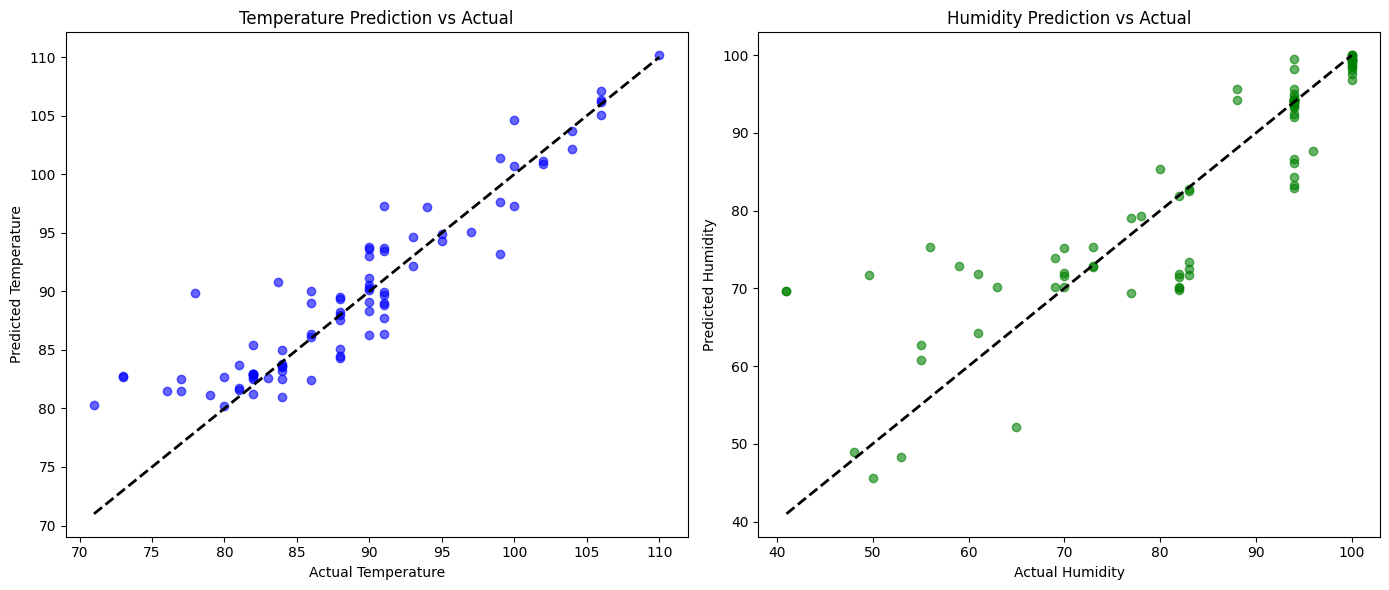

In [167]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv("temperature.csv")  # Replace with your file path
df['Date'] = pd.to_datetime(df.index)  # Parse the date from index
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

# Define features
X = df.drop(["Temp Max (°F)", "Humidity Max (%)", "Date"], axis=1)  # Features

# Define separate targets
y_temp = df["Temp Max (°F)"]
y_humidity = df["Humidity Max (%)"]

# Train-Test Splits
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_humidity, X_test_humidity, y_train_humidity, y_test_humidity = train_test_split(X, y_humidity, test_size=0.2, random_state=42)

# Train Temperature Model
temp_model = RandomForestRegressor()
temp_model.fit(X_train_temp, y_train_temp)
joblib.dump(temp_model, 'temperature_prediction_model.pkl')  # Save temperature model

# Train Humidity Model
humidity_model = RandomForestRegressor()
humidity_model.fit(X_train_humidity, y_train_humidity)
joblib.dump(humidity_model, 'humidity_prediction_model.pkl')  # Save humidity model

print("Models trained and saved successfully!")

# Evaluate Temperature Model
y_temp_pred = temp_model.predict(X_test_temp)
mae_temp = mean_absolute_error(y_test_temp, y_temp_pred)
mse_temp = mean_squared_error(y_test_temp, y_temp_pred)
r2_temp = r2_score(y_test_temp, y_temp_pred)

print("\nTemperature Model Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae_temp:.2f}")
print(f"Mean Squared Error (MSE): {mse_temp:.2f}")
print(f"R² Score: {r2_temp:.2f}")

# Evaluate Humidity Model
y_humidity_pred = humidity_model.predict(X_test_humidity)
mae_humidity = mean_absolute_error(y_test_humidity, y_humidity_pred)
mse_humidity = mean_squared_error(y_test_humidity, y_humidity_pred)
r2_humidity = r2_score(y_test_humidity, y_humidity_pred)

print("\nHumidity Model Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae_humidity:.2f}")
print(f"Mean Squared Error (MSE): {mse_humidity:.2f}")
print(f"R² Score: {r2_humidity:.2f}")

# Visualization of Predictions
plt.figure(figsize=(14, 6))

# Temperature Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test_temp, y_temp_pred, alpha=0.6, color="blue")
plt.plot([y_test_temp.min(), y_test_temp.max()], [y_test_temp.min(), y_test_temp.max()], "k--", lw=2)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Temperature Prediction vs Actual")

# Humidity Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test_humidity, y_humidity_pred, alpha=0.6, color="green")
plt.plot([y_test_humidity.min(), y_test_humidity.max()], [y_test_humidity.min(), y_test_humidity.max()], "k--", lw=2)
plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Humidity Prediction vs Actual")

plt.tight_layout()
plt.show()


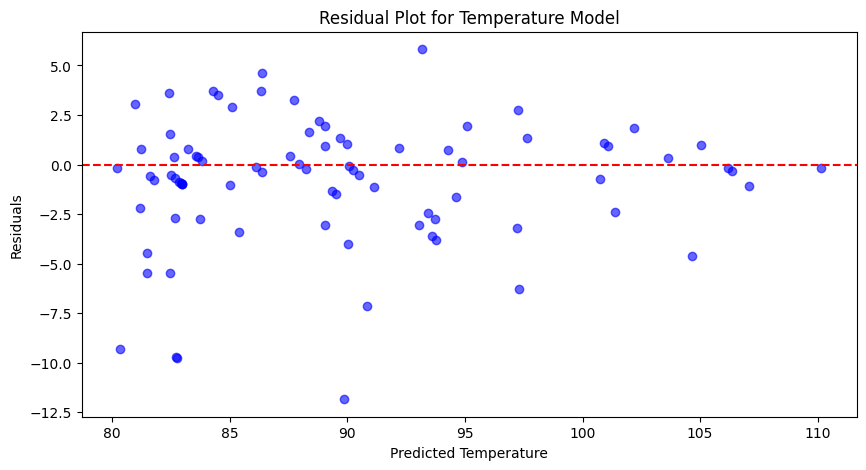

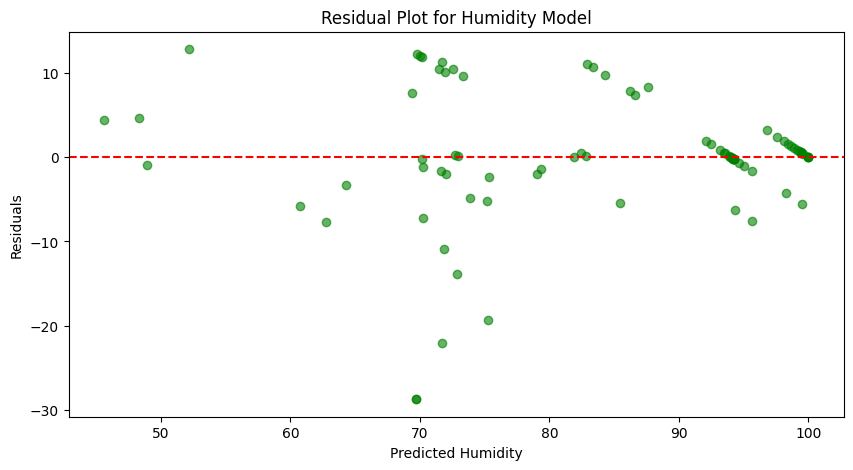

In [168]:
import matplotlib.pyplot as plt

# Residuals for Temperature
temp_residuals = y_test_temp - y_temp_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_temp_pred, temp_residuals, alpha=0.6, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals")
plt.title("Residual Plot for Temperature Model")
plt.show()

# Residuals for Humidity
humidity_residuals = y_test_humidity - y_humidity_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_humidity_pred, humidity_residuals, alpha=0.6, color="green")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Humidity")
plt.ylabel("Residuals")
plt.title("Residual Plot for Humidity Model")
plt.show()


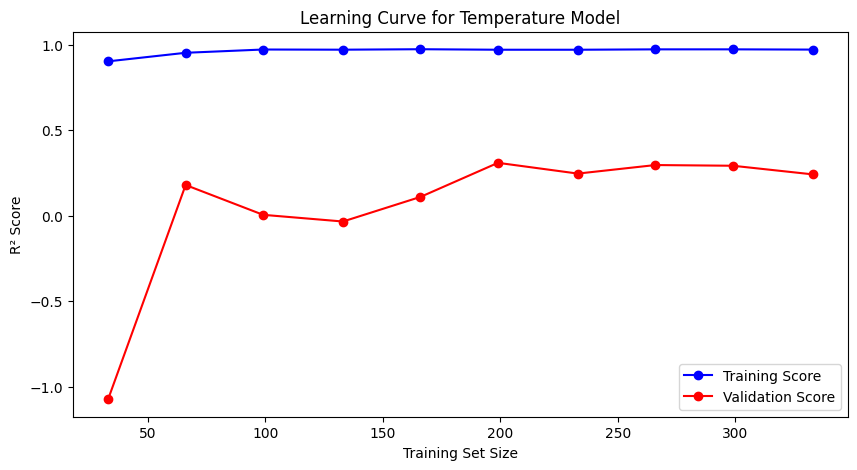

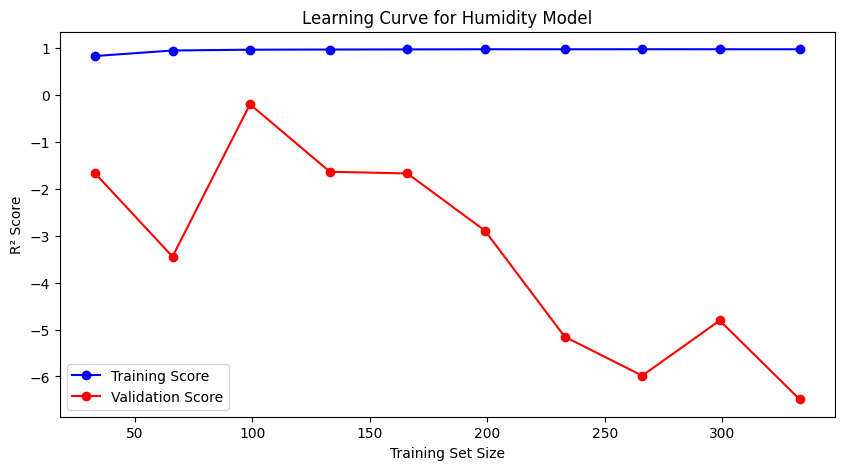

In [169]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 5))
    plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Score")
    plt.plot(train_sizes, test_mean, "o-", color="red", label="Validation Score")
    plt.xlabel("Training Set Size")
    plt.ylabel("R² Score")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot for Temperature Model
plot_learning_curve(temp_model, X, y_temp, "Learning Curve for Temperature Model")

# Plot for Humidity Model
plot_learning_curve(humidity_model, X, y_humidity, "Learning Curve for Humidity Model")
